# Problem: Lead Scoring Model

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
data=pd.read_csv(r"C:\Users\goura\Downloads\Data_Science_Internship - Dump.csv")
data.shape

(46608, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


# Data Preprocessing and Handling Missing Values

In [6]:
data["movein"].value_counts()

10/09/22    2453
31/08/22    2191
01/09/22    2123
09/09/22    1565
17/09/22    1424
            ... 
20/10/23       1
24/06/24       1
12/04/23       1
19/10/23       1
06/06/23       1
Name: movein, Length: 477, dtype: int64

In [7]:
data.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

# Feature Engineering

## Removing the NaN data features Separating the Label data to handle missing values

## Dropping the leads with status other than WON or LOST

In [8]:
data=data[(data['status'] == 'LOST') | (data['status'] == 'WON')]

In [9]:
data=data[["status","lost_reason","budget","lease","movein","room_type"]]

In [10]:
data

,status,lost_reason,budget,lease,movein,room_type
0,LOST,Not responding,NaN,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite
3,LOST,Low budget,0-0,0,NaN,NaN
4,LOST,Junk lead,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
46603,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,Studio
46604,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,Studio
46605,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,Studio
46606,LOST,Low availability,1108,294,30/08/22,NaN


In [11]:
null_pertanage=[]
def null_per(x):
    for i in x.columns:
        a=x[i].isnull().sum()/len(x[i]) * 100
        print(i,a)
        if a>=5:
            null_pertanage.append(i)
null_per(data) 

status 0.0
lost_reason 6.634712956365914
budget 7.975473368309692
lease 5.04350454476758
movein 29.38445926981454
room_type 50.71787896452706


In [12]:
data["status"].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [13]:
#Exracting WON label
a=data["status"] == 'WON'

In [14]:
data1=data[a]

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 98 to 46592
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       3073 non-null   object
 1   lost_reason  0 non-null      object
 2   budget       2994 non-null   object
 3   lease        3017 non-null   object
 4   movein       2442 non-null   object
 5   room_type    1461 non-null   object
dtypes: object(6)
memory usage: 168.1+ KB


In [16]:
missing_data=data1.isnull().sum()
missing_data

status            0
lost_reason    3073
budget           79
lease            56
movein          631
room_type      1612
dtype: int64

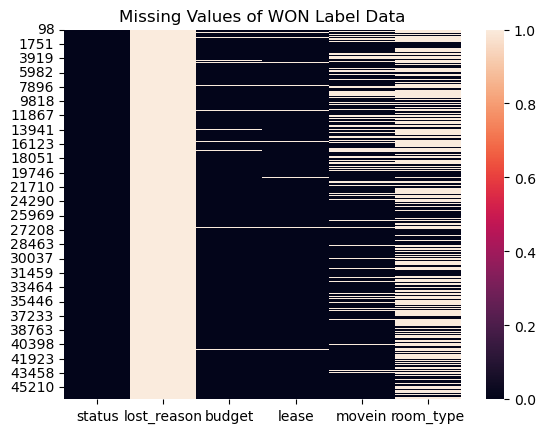

In [17]:
#Representation of null values for WON label data
sns.heatmap(data1.isnull())
plt.title('Missing Values of WON Label Data')
plt.show()

# Key Takeaways from the WON Label Dataset Heatmap:
    
1.There was no information found for lost reason.

2.Approximately half of the data for roomtype is missing, followed by movein.

3.Some data points for both budget and lease features are missing.

In [18]:
data1['room_type'].value_counts()

Ensuite         855
Studio          449
Entire Place    157
Name: room_type, dtype: int64

In [19]:
# Encoding room_type data 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.loc[:, 'room_type'] = le.fit_transform(data1['room_type'])

In [21]:
#To handle missing/null values for room_type data using knn impltiter 
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
num=[col for col in data1.columns if data1[col].dtypes !='O']
knn.fit(data1[num])

KNNImputer()

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 98 to 46592
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       3073 non-null   object
 1   lost_reason  0 non-null      object
 2   budget       2994 non-null   object
 3   lease        3017 non-null   object
 4   movein       2442 non-null   object
 5   room_type    3073 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 156.1+ KB


In [25]:
data1["lease"].value_counts().sum() #fill with zero #to fill this use knn impltiter
data1['lease'].isnull().sum()

56

In [26]:
#Filling missing values with mode for lease
mode_val = data1['lease'].mode()[0]
data1['lease'].fillna(mode_val, inplace=True)
data1.isnull().sum()

status            0
lost_reason    3073
budget           79
lease             0
movein          631
room_type         0
dtype: int64

In [27]:
#Converting the categorical data for lease feature
data1.loc[:, 'lease']=le.fit_transform(data1['lease'])

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 98 to 46592
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       3073 non-null   object
 1   lost_reason  0 non-null      object
 2   budget       2994 non-null   object
 3   lease        3073 non-null   int32 
 4   movein       2442 non-null   object
 5   room_type    3073 non-null   int32 
dtypes: int32(2), object(4)
memory usage: 144.0+ KB


In [29]:
data1['budget'].value_counts()

£121 - £180 Per Week    637
£60 - £120 Per week     522
0-0                     212
£181 - £240 Per Week    135
0-100                    86
                       ... 
319                       1
0-70 to 100               1
150-180/week              1
308                       1
£135 Per week             1
Name: budget, Length: 346, dtype: int64

In [30]:
data1['budget'].isnull().sum()

79

In [31]:
#Filling missing values with mode for budget
mode_budget = data1['budget'].mode()[0]
data1['budget'].fillna(mode_budget, inplace=True)
data1.isnull().sum()

status            0
lost_reason    3073
budget            0
lease             0
movein          631
room_type         0
dtype: int64

In [32]:
# Converting Categorical variable budget by using LabelEncoder
data1.loc[:, 'budget']=le.fit_transform(data1['budget'])

In [33]:
null_per(data1)

status 0.0
lost_reason 100.0
budget 0.0
lease 0.0
movein 20.53368044256427
room_type 0.0


In [34]:
#using Simple Imputer to impute missing values with most frequent strategy
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(data1[['movein']])
data1['movein'] = np.squeeze(imputed_data)

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3073 entries, 98 to 46592
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       3073 non-null   object
 1   lost_reason  0 non-null      object
 2   budget       3073 non-null   int32 
 3   lease        3073 non-null   int32 
 4   movein       3073 non-null   object
 5   room_type    3073 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 132.0+ KB


In [36]:
data1.head()

,status,lost_reason,budget,lease,movein,room_type
98,WON,NaN,85,51,10/09/22,3
111,WON,NaN,326,62,09/09/22,2
139,WON,NaN,336,62,29/09/22,1
141,WON,NaN,306,61,07/09/22,0
152,WON,NaN,326,62,31/08/22,1


In [37]:
b=data["status"] == 'LOST'
data2=data[b]
data2.isnull().sum()

status             0
lost_reason        0
budget          3615
lease           2280
movein         12979
room_type      21879
dtype: int64

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43244 entries, 0 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       43244 non-null  object
 1   lost_reason  43244 non-null  object
 2   budget       39629 non-null  object
 3   lease        40964 non-null  object
 4   movein       30265 non-null  object
 5   room_type    21365 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


In [39]:
# Imputing budget column
data2.head()

,status,lost_reason,budget,lease,movein,room_type
0,LOST,Not responding,NaN,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite
3,LOST,Low budget,0-0,0,NaN,NaN
4,LOST,Junk lead,NaN,NaN,NaN,NaN


In [40]:
data2['lost_reason'].value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied               17
Guarantor issue          

In [41]:
data2['budget'].value_counts()

£60 - £120 Per week     9228
£121 - £180 Per Week    8241
0-0                     5507
£181 - £240 Per Week    2008
100                     1453
                        ... 
90-100£                    1
0-Max 425                  1
250 Per Week               1
0-80-100$                  1
0-500 PCM                  1
Name: budget, Length: 1769, dtype: int64

In [42]:
# Using Simple imputer to handle the missing values for budget feature
imputed_data2 = imputer.fit_transform(data2[['budget']])
data2['budget'] = np.squeeze(imputed_data2)
null_per(data2)

status 0.0
lost_reason 0.0
budget 0.0
lease 5.272407732864675
movein 30.013412265285353
room_type 50.59430209971325


In [43]:
# Using Simple imputer to handle the missing values for lease data
imputed_lease = imputer.fit_transform(data2[['lease']])
data2['lease'] = np.squeeze(imputed_lease)


# Using Simple imputer to handle the missing values for movein data
imputed_movein = imputer.fit_transform(data2[['movein']])
data2['movein'] = np.squeeze(imputed_movein)


# Encoding room_type data and handling missing values by using KNN imputer
data2.loc[:, 'room_type'] = le.fit_transform(data2['room_type'])
num=[col for col in data2.columns if data2[col].dtypes !='O']
knn.fit(data2[num])

KNNImputer()

In [44]:
data2.isnull().sum()

status         0
lost_reason    0
budget         0
lease          0
movein         0
room_type      0
dtype: int64

In [45]:
data2.lost_reason.value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied               17
Guarantor issue          

In [46]:
df=pd.concat([data1,data2])
df.head()

,status,lost_reason,budget,lease,movein,room_type
98,WON,NaN,85,51,10/09/22,3
111,WON,NaN,326,62,09/09/22,2
139,WON,NaN,336,62,29/09/22,1
141,WON,NaN,306,61,07/09/22,0
152,WON,NaN,326,62,31/08/22,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 98 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       46317 non-null  object
 1   lost_reason  43244 non-null  object
 2   budget       46317 non-null  object
 3   lease        46317 non-null  object
 4   movein       46317 non-null  object
 5   room_type    46317 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 2.3+ MB


In [48]:
# Assiging 0 for Null value of lost_reason 
df['lost_reason'].fillna(0, inplace=True)
df['lost_reason'].isnull().sum()

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 98 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       46317 non-null  object
 1   lost_reason  46317 non-null  object
 2   budget       46317 non-null  object
 3   lease        46317 non-null  object
 4   movein       46317 non-null  object
 5   room_type    46317 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 2.3+ MB


In [50]:
df.isnull().sum()

status         0
lost_reason    0
budget         0
lease          0
movein         0
room_type      0
dtype: int64

# EDA for Status feature

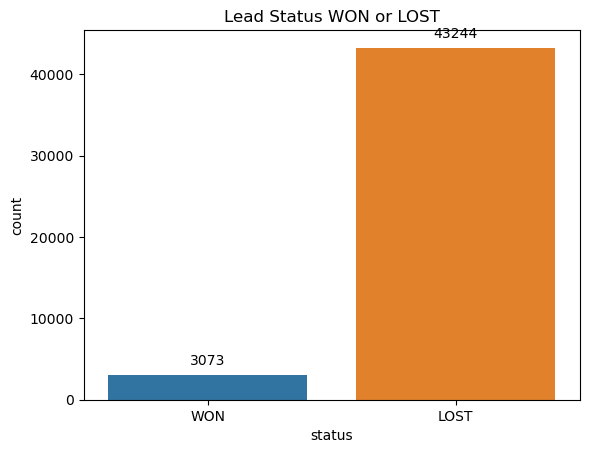

In [51]:
# Exploring Status data
ax=sns.countplot(x='status',data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Lead Status WON or LOST')
plt.show()

# Key Observations from Above Countplot: 

### Because the status has two classes, WON has 3073 data points and LOST has 43244 data points, the data is completely imbalanced, so we must choose under sampling.

In [52]:
#Identifying the minority class
minority_class = df['status'].value_counts().idxmin()
minority_class

'WON'

In [53]:
# Randomly selecting samples from the majority class
majority_class = df[df['status'] != minority_class]
undersampled_majority = majority_class.sample(n=len(df[df['status'] == minority_class]), random_state=42)

# Combining the minority class with the undersampled majority class
undersampled_data = pd.concat([undersampled_majority, df[df['status'] == minority_class]])

# Shuffle the data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)

#Final dataset after undersampling
undersampled_data

,status,lost_reason,budget,lease,movein,room_type
39682,WON,0,326,61,31/08/22,0
41431,LOST,Not interested,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,1
2387,WON,0,302,2,03/09/22,3
44680,LOST,Wants private accommodation,£60 - £120 Per week,0,31/08/22,5
32359,WON,0,342,62,23/09/22,0
...,...,...,...,...,...,...
11642,WON,0,342,65,02/09/22,0
32988,WON,0,300,35,07/09/22,3
33686,WON,0,342,62,10/09/22,0
36088,WON,0,326,62,12/09/22,0


In [54]:
undersampled_data['lost_reason'].isnull().sum()

0

### Because the data set contains a feedback column in text form, we must perform text preprocessing and feature extraction from the lost reason feature.

# Text Data Analysis and Text Data Feature Extraction (lost reason)

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


book = undersampled_data[['lost_reason']]
book

,lost_reason
39682,0
41431,Not interested
2387,0
44680,Wants private accommodation
32359,0
...,...
11642,0
32988,0
33686,0
36088,0


In [56]:
#Converting the data type to string
book['lost_reason'] = book['lost_reason'].astype(str).str.strip()
book = book[book['lost_reason'] != '']
# Removing space and empty strings from the list
book = [lost_reason.strip() for lost_reason in book.lost_reason] 
book = [lost_reason for lost_reason in book if lost_reason] 
book

['0',
 'Not interested',
 '0',
 'Wants private accommodation',
 '0',
 '0',
 '0',
 '0',
 '0',
 'Not responding',
 '0',
 'Booked with competitor',
 '0',
 'Low budget',
 '0',
 '0',
 'Not responding',
 '0',
 '0',
 '0',
 'Low availability',
 'Low availability',
 'Not interested',
 '0',
 'Short stay',
 '0',
 'Not interested',
 '0',
 '0',
 '0',
 'Short stay',
 'Not responding',
 'Low budget',
 '0',
 'Not a student',
 'Semester stay',
 'Not interested',
 '0',
 'Not interested',
 'Low availability',
 '0',
 'Not responding',
 '0',
 'Not responding',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'Short stay',
 'Inadequate details',
 'Low availability',
 'Semester stay',
 'Wants private accommodation',
 '0',
 '0',
 'Inadequate details',
 '0',
 'Low availability',
 'Short stay',
 'Booked with manager',
 '0',
 'Supply issue',
 'Booked with competitor',
 '0',
 '0',
 '0',
 'Short stay',
 '0',
 'Not interested',
 'Not interested',
 'Low availability',
 '0',
 'Wants private accommodation',
 '0',
 'Not interested

In [57]:
# Joining the list into one string/text
text = ' '.join(book)
text

"0 Not interested 0 Wants private accommodation 0 0 0 0 0 Not responding 0 Booked with competitor 0 Low budget 0 0 Not responding 0 0 0 Low availability Low availability Not interested 0 Short stay 0 Not interested 0 0 0 Short stay Not responding Low budget 0 Not a student Semester stay Not interested 0 Not interested Low availability 0 Not responding 0 Not responding 0 0 0 0 0 0 Short stay Inadequate details Low availability Semester stay Wants private accommodation 0 0 Inadequate details 0 Low availability Short stay Booked with manager 0 Supply issue Booked with competitor 0 0 0 Short stay 0 Not interested Not interested Low availability 0 Wants private accommodation 0 Not interested Not interested Not responding 0 0 Repeat lead 0 0 0 Not responding 0 Junk lead Semester stay 0 Low availability Not interested Low availability 0 Booked with manager 0 Low availability Low availability 0 0 Low budget Low availability 0 0 Low budget 0 0 Not responding 0 0 Low availability Not interested 

In [58]:
#Removing all Punctuation marks
import string
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'0 Not interested 0 Wants private accommodation 0 0 0 0 0 Not responding 0 Booked with competitor 0 Low budget 0 0 Not responding 0 0 0 Low availability Low availability Not interested 0 Short stay 0 Not interested 0 0 0 Short stay Not responding Low budget 0 Not a student Semester stay Not interested 0 Not interested Low availability 0 Not responding 0 Not responding 0 0 0 0 0 0 Short stay Inadequate details Low availability Semester stay Wants private accommodation 0 0 Inadequate details 0 Low availability Short stay Booked with manager 0 Supply issue Booked with competitor 0 0 0 Short stay 0 Not interested Not interested Low availability 0 Wants private accommodation 0 Not interested Not interested Not responding 0 0 Repeat lead 0 0 0 Not responding 0 Junk lead Semester stay 0 Low availability Not interested Low availability 0 Booked with manager 0 Low availability Low availability 0 0 Low budget Low availability 0 0 Low budget 0 0 Not responding 0 0 Low availability Not interested 

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
#Tokenization
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['0', 'Not', 'interested', '0', 'Wants', 'private', 'accommodation', '0', '0', '0', '0', '0', 'Not', 'responding', '0', 'Booked', 'with', 'competitor', '0', 'Low', 'budget', '0', '0', 'Not', 'responding', '0', '0', '0', 'Low', 'availability', 'Low', 'availability', 'Not', 'interested', '0', 'Short', 'stay', '0', 'Not', 'interested', '0', '0', '0', 'Short', 'stay', 'Not', 'responding', 'Low', 'budget', '0']


In [61]:
len(text_tokens)

9839

In [62]:
#Removing stopwords
from nltk.corpus import stopwords
# nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words.append('the')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
my_stop_words
#my_stop_words.append('Its')

# Simplified look of the no_stop_tokes for loop
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""


no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['0', 'Not', 'interested', '0', 'Wants', 'private', 'accommodation', '0', '0', '0', '0', '0', 'Not', 'responding', '0', 'Booked', 'competitor', '0', 'Low', 'budget', '0', '0', 'Not', 'responding', '0', '0', '0', 'Low', 'availability', 'Low', 'availability', 'Not', 'interested', '0', 'Short', 'stay', '0', 'Not', 'interested', '0']


In [64]:
#Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['0', 'not', 'interested', '0', 'wants', 'private', 'accommodation', '0', '0', '0', '0', '0', 'not', 'responding', '0', 'booked', 'competitor', '0', 'low', 'budget', '0', '0', 'not', 'responding', '0']


In [65]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['0', 'not', 'interest', '0', 'want', 'privat', 'accommod', '0', '0', '0', '0', '0', 'not', 'respond', '0', 'book', 'competitor', '0', 'low', 'budget', '0', '0', 'not', 'respond', '0', '0', '0', 'low', 'avail', 'low', 'avail', 'not', 'interest', '0', 'short', 'stay', '0', 'not', 'interest', '0']


In [67]:
import spacy
!pip install -U spacy

import spacy

!pip install pydantic==1.10.2

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\goura\\anaconda3\\Lib\\site-packages\\~ydantic\\annotated_types.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 2.1/2.1 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.6
    Uninstalling pydantic-1.10.6:
      Successfully uninstalled pydantic-1.10.6


In [68]:
!python -m spacy download en_core_web_sm  
!python -m spacy download en_core_web_md  
!python -m spacy download en_core_web_lg  

     ---------------------------------------- 12.8/12.8 MB 4.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ---------------------------------------- 42.8/42.8 MB 4.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
     ------------------------------------ 587.7/587.7 MB 795.2 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [69]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_lg")


# joining the tokens after removing stop words
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

0 Not interested 0 Wants private accommodation 0 0 0 0 0 Not responding 0 Booked competitor 0 Low budget 0 0 Not responding 0 0 0 Low availability Low availability Not interested 0 Short stay 0 Not interested 0


In [70]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['0', 'not', 'interested', '0', 'want', 'private', 'accommodation', '0', '0', '0', '0', '0', 'not', 'respond', '0', 'book', 'competitor', '0', 'low', 'budget', '0', '0', 'not', 'respond', '0']


# Extracting Features from the text data using tfidf vectorizer

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())

print(tf_idf_matrix_n_gram_max_features.toarray())

['availability', 'budget', 'interested', 'low', 'low availability', 'low budget', 'not', 'not interested', 'not responding', 'responding']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.62529835 ... 0.62529835 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.61935183 0.61935183]]


In [72]:
tfidf=tf_idf_matrix_n_gram_max_features.toarray()
tfidf.shape

(6146, 10)

In [73]:
text_data=pd.DataFrame(tfidf, columns=['availability', 'budget', 'interested', 'low', 'low availability', 'low budget', 'not', 'not interested', 'not responding', 'responding'])
text_data.head(2)


,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.625298,0.0,0.0,0.0,0.466909,0.625298,0.0,0.0


In [74]:
undersampled_data.head(2)

,status,lost_reason,budget,lease,movein,room_type
39682,WON,0,326,61,31/08/22,0
41431,LOST,Not interested,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,1


In [81]:
#Label Encoding for Status
undersampled_data['status'] = undersampled_data['status'].replace({'WON': 1, 'LOST':0})

In [80]:
# Converting budget to string data type
undersampled_data['budget'] = undersampled_data['budget'].astype(str)
# Label Encoding for budget
undersampled_data.loc[:, 'budget']=le.fit_transform(undersampled_data['budget'])

In [82]:
# Converting lease to string data type
undersampled_data['lease']=undersampled_data['lease'].astype(str)

# Label Encoding for lease
undersampled_data.loc[:, 'lease']=le.fit_transform(undersampled_data['lease'])

# set index of undersampled data to text data so that we can combine the data
text_data = text_data.set_index(undersampled_data.index)

# Concatenating both data sets
combined_df = pd.concat([undersampled_data, text_data], axis=1)

In [83]:
combined_df.head()

,status,budget,lease,movein,room_type,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding
39682,1,293,120,31/08/22,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
41431,0,447,19,15/09/22,1,0.0,0.0,0.625298,0.0,0.0,0.0,0.466909,0.625298,0.0,0.0
2387,1,264,42,03/09/22,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
44680,0,455,0,31/08/22,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
32359,1,313,121,23/09/22,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [84]:
# Converting Date column to datetime type
combined_df['movein'] = pd.to_datetime(combined_df['movein'])
combined_df.head()

,status,budget,lease,movein,room_type,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding
39682,1,293,120,2022-08-31,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
41431,0,447,19,2022-09-15,1,0.0,0.0,0.625298,0.0,0.0,0.0,0.466909,0.625298,0.0,0.0
2387,1,264,42,2022-03-09,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
44680,0,455,0,2022-08-31,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
32359,1,313,121,2022-09-23,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [85]:
#  Converting date column to month, year, day, and weekday
combined_df['month'] = combined_df['movein'].dt.month
combined_df['year'] = combined_df['movein'].dt.year
combined_df['day'] = combined_df['movein'].dt.day
combined_df['weekday'] = combined_df['movein'].dt.day_name()
combined_df.head()

,status,budget,lease,movein,room_type,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding,month,year,day,weekday
39682,1,293,120,2022-08-31,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8,2022,31,Wednesday
41431,0,447,19,2022-09-15,1,0.0,0.0,0.625298,0.0,0.0,0.0,0.466909,0.625298,0.0,0.0,9,2022,15,Thursday
2387,1,264,42,2022-03-09,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3,2022,9,Wednesday
44680,0,455,0,2022-08-31,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8,2022,31,Wednesday
32359,1,313,121,2022-09-23,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9,2022,23,Friday


In [86]:
# Removing movein from dataset
combined_df=combined_df.drop('movein', axis=1)

#Converting weekday to numerical
weekday_series = combined_df['weekday']

combined_df['weekday_label'] = LabelEncoder().fit_transform(weekday_series)
combined_df.head(2)
combined_df=combined_df.drop('weekday', axis=1)
combined_df

,status,budget,lease,room_type,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding,month,year,day,weekday_label
39682,1,293,120,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8,2022,31,6
41431,0,447,19,1,0.0,0.0,0.625298,0.0,0.0,0.0,0.466909,0.625298,0.000000,0.000000,9,2022,15,4
2387,1,264,42,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3,2022,9,6
44680,0,455,0,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8,2022,31,6
32359,1,313,121,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9,2022,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11642,1,313,124,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2,2022,9,6
32988,1,258,67,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7,2022,9,2
33686,1,313,121,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10,2022,9,3
36088,1,293,121,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,12,2022,9,0


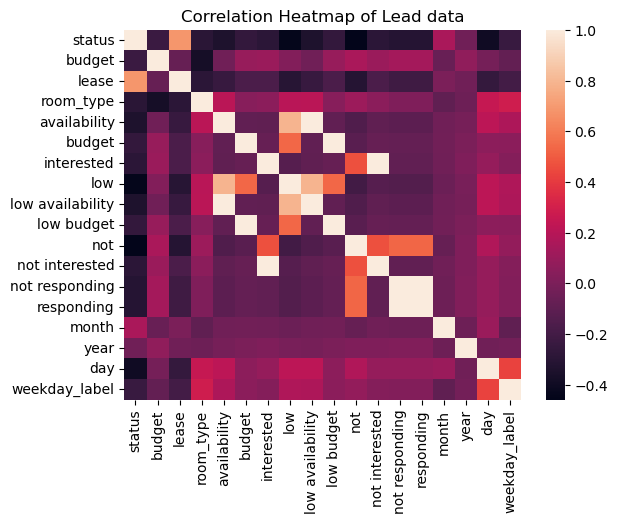

In [87]:
# Correlation representaiton using Heatmap 
sns.heatmap(combined_df.corr())
plt.title('Correlation Heatmap of Lead data')
plt.show()

### Key Insights from the Lead Data Correlation Heatmap:
Budget vs low budget and availability vs low availability are highly correlated features.

In [88]:
combined_df.corr()

,status,budget,lease,room_type,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding,month,year,day,weekday_label
status,1.000000,-0.234550,0.683268,-0.295073,-0.338850,-0.259585,-0.290072,-0.445657,-0.338850,-0.259585,-0.458071,-0.290072,-0.314442,-0.314442,0.154807,-0.041215,-0.397082,-0.240360
budget,-0.234550,1.000000,-0.072826,-0.374788,-0.040360,0.091083,0.104141,0.021374,-0.040360,0.091083,0.151785,0.104141,0.134379,0.134379,-0.068809,0.070631,-0.023933,-0.086280
lease,0.683268,-0.072826,1.000000,-0.289602,-0.242651,-0.170143,-0.172119,-0.309526,-0.242651,-0.170143,-0.312334,-0.172119,-0.214803,-0.214803,0.000796,-0.036812,-0.253840,-0.198568
room_type,-0.295073,-0.374788,-0.289602,1.000000,0.212600,0.041222,0.052248,0.205374,0.212600,0.041222,0.110143,0.052248,0.012382,0.012382,-0.098135,-0.051878,0.248301,0.286428
availability,-0.338850,-0.040360,-0.242651,0.212600,1.000000,-0.087961,-0.098291,0.794001,1.000000,-0.087961,-0.155218,-0.098291,-0.106549,-0.106549,-0.038930,-0.014701,0.215743,0.166230
budget,-0.259585,0.091083,-0.170143,0.041222,-0.087961,1.000000,-0.075298,0.535720,-0.087961,1.000000,-0.118908,-0.075298,-0.081624,-0.081624,-0.035942,-0.001963,0.055964,0.050973
interested,-0.290072,0.104141,-0.172119,0.052248,-0.098291,-0.075298,1.000000,-0.129273,-0.098291,-0.075298,0.468031,1.000000,-0.091211,-0.091211,-0.039316,0.009535,0.084512,0.030335
low,-0.445657,0.021374,-0.309526,0.205374,0.794001,0.535720,-0.129273,1.000000,0.794001,0.535720,-0.204143,-0.129273,-0.140133,-0.140133,-0.054935,-0.013660,0.217035,0.172018
low availability,-0.338850,-0.040360,-0.242651,0.212600,1.000000,-0.087961,-0.098291,0.794001,1.000000,-0.087961,-0.155218,-0.098291,-0.106549,-0.106549,-0.038930,-0.014701,0.215743,0.166230
low budget,-0.259585,0.091083,-0.170143,0.041222,-0.087961,1.000000,-0.075298,0.535720,-0.087961,1.000000,-0.118908,-0.075298,-0.081624,-0.081624,-0.035942,-0.001963,0.055964,0.050973


In [89]:
combined_df.columns

Index(['status', 'budget', 'lease', 'room_type', 'availability', 'budget',
       'interested', 'low', 'low availability', 'low budget', 'not',
       'not interested', 'not responding', 'responding', 'month', 'year',
       'day', 'weekday_label'],
      dtype='object')

# Building a Logistics Regression Model

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Defining Indpendent and dependent variables
x=combined_df.drop('status', axis=1)
y=combined_df['status']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

# Building a logisticRegression machine learning algorithm
model = LogisticRegression()

# Train the model on the training set
model.fit(x_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = model.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print('Logistic Regression model Accuracy is :', accuracy_lr*100,'%')

Logistic Regression model Accuracy is : 92.35772357723577 %


In [91]:
proba_score=model.predict_proba(x_test)
proba_score=proba_score*100
proba_score

array([[9.90564967e+00, 9.00943503e+01],
       [1.42767985e+00, 9.85723202e+01],
       [4.06686792e-01, 9.95933132e+01],
       ...,
       [9.99537470e+01, 4.62529967e-02],
       [9.36931323e-01, 9.90630687e+01],
       [1.92165692e+01, 8.07834308e+01]])

In [92]:
x_test.columns

Index(['budget', 'lease', 'room_type', 'availability', 'budget', 'interested',
       'low', 'low availability', 'low budget', 'not', 'not interested',
       'not responding', 'responding', 'month', 'year', 'day',
       'weekday_label'],
      dtype='object')

# Combining the x_test data with its lead scoring for both 0(LOST) class and 1(WON) class

In [93]:
combined_data = np.concatenate((x_test, proba_score), axis=1)
combined_data
Lead_score_data=pd.DataFrame(combined_data, columns=['budget', 'lease', 'room_type', 'availability', 'budget', 'interested',
       'low', 'low availability', 'low budget', 'not', 'not interested',
       'not responding', 'responding', 'month', 'year', 'day',
       'weekday_label', 'Lead_Score for 0(LOST) class','Lead_Score for 1(WON) class'])
Lead_score_data

,budget,lease,room_type,availability,budget,interested,low,low availability,low budget,not,not interested,not responding,responding,month,year,day,weekday_label,Lead_Score for 0(LOST) class,Lead_Score for 1(WON) class
0,266.0,67.0,3.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,10.0,2022.0,9.0,3.0,9.905650,90.094350
1,308.0,121.0,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,9.0,2022.0,19.0,1.0,1.427680,98.572320
2,293.0,121.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,9.0,2022.0,17.0,2.0,0.406687,99.593313
3,1.0,0.0,5.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,8.0,2022.0,31.0,6.0,94.378323,5.621677
4,450.0,23.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.4825,0.0,0.619352,0.619352,9.0,2022.0,18.0,3.0,97.060936,2.939064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.0,0.0,3.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,10.0,2022.0,9.0,3.0,15.036053,84.963947
1226,32.0,100.0,3.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,10.0,2022.0,9.0,3.0,0.564518,99.435482
1227,146.0,0.0,5.0,0.605292,0.0,0.0,0.516956,0.605292,0.0,0.0000,0.0,0.000000,0.000000,8.0,2022.0,31.0,6.0,99.953747,0.046253
1228,313.0,121.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,9.0,2022.0,13.0,5.0,0.936931,99.063069


In [94]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[549  65]
 [ 29 587]]


# Calculation of Precision, Recall,F1 score from Classification report
# Classification report

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       614
           1       0.90      0.95      0.93       616

    accuracy                           0.92      1230
   macro avg       0.93      0.92      0.92      1230
weighted avg       0.93      0.92      0.92      1230

